In [4]:
import numpy as np
import matplotlib.pyplot as pp
import seaborn

In [5]:
     dskN 

In [7]:
import urllib
urllib.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt','stations.txt') #2.7
#urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt','stations.txt') #3+

('stations.txt', <mimetools.Message instance at 0x10faa2710>)

In [8]:
open('stations.txt','r').readlines()[:5]

['ACW00011604  17.1167  -61.7833   10.1    ST JOHNS COOLIDGE FLD                       \n',
 'ACW00011647  17.1333  -61.7833   19.2    ST JOHNS                                    \n',
 'AE000041196  25.3330   55.5170   34.0    SHARJAH INTER. AIRP            GSN     41196\n',
 'AEM00041194  25.2550   55.3640   10.4    DUBAI INTL                             41194\n',
 'AEM00041217  24.4330   54.6510   26.8    ABU DHABI INTL                         41217\n']

In [11]:
tracked_stations = {line.split()[0]:' '.join(line.split()[4:]) for line in open('stations.txt','r') if 'GSN' in line } 

In [12]:
len(tracked_stations)

994

In [15]:
def findstation(s):
    return {code: name for code,name in tracked_stations.items() if s in name}

In [16]:
findstation('SAN DIEGO')

{'USW00023188': 'CA SAN DIEGO LINDBERGH FLD GSN 72290'}

In [19]:
findstation('LONDON')

{'SF000068858': 'EAST LONDON GSN 68858'}

In [22]:
dly_delimiter = [11,4,2,4] + [5,1,1,1] * 31
dly_usecols = [1,2,3] + [4*i for i in range(1,32)]
dly_dtype = [np.int32,np.int32,(np.str_,4)] + [np.int32] * 31
dly_names = ['year','month','obs'] + [str(day) for day in range(1,31+1)]

In [24]:
def parsefile(filename):
    return np.genfromtxt(filename,
                         delimiter = dly_delimiter,
                         usecols = dly_usecols,
                         dtype = dly_dtype,
                         names = dly_names)

In [26]:
SAN_DIEGO = parsefile('USW00023188.dly')

In [27]:
SAN_DIEGO

array([ (1939, 7, 'TMAX', 244, 233, 217, 217, 222, 222, 239, 239, 244, 244, 267, 261, 228, 233, 217, 211, 206, 222, 233, 233, 250, 244, 244, 256, 261, 256, 239, 250, 239, 244, 244),
       (1939, 7, 'TMIN', 172, 183, 167, 172, 178, 183, 161, 172, 183, 183, 172, 178, 172, 167, 156, 150, 156, 167, 156, 189, 172, 178, 178, 183, 194, 178, 178, 172, 183, 183, 189),
       (1939, 7, 'PRCP', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
       ...,
       (2015, 9, 'WSF5', 72, 76, 76, 81, 81, 76, 81, 94, 103, 72, 58, 72, 63, 76, 125, 76, 81, -9999, 63, 98, 89, 67, 76, 67, 67, 63, -9999, -9999, -9999, -9999, -9999),
       (2015, 9, 'WT01', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, 1, 1, -9999, -9999, -9999, -9999, -9999, -9999, -9999, 1, -9999, 1, -9999, -9999, -9999, -9999, -9999),
       (2015, 9, 'WT08', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, 

In [28]:
def unroll(record):
    startdate = np.datetime64('{}-{:02}'.format(record['year'],record['month']))
    dates = np.arange(startdate,startdate + np.timedelta64(1,'M'),np.timedelta64(1,'D'))
    
    rows = [(date,record[str(i+1)]/10) for i,date in enumerate(dates)]
    
    return np.array(rows,dtype=[('date','M8[D]'),('value','d')])

In [29]:
unroll(SAN_DIEGO[0])

array([(datetime.date(1939, 7, 1), 24.0),
       (datetime.date(1939, 7, 2), 23.0),
       (datetime.date(1939, 7, 3), 21.0),
       (datetime.date(1939, 7, 4), 21.0),
       (datetime.date(1939, 7, 5), 22.0),
       (datetime.date(1939, 7, 6), 22.0),
       (datetime.date(1939, 7, 7), 23.0),
       (datetime.date(1939, 7, 8), 23.0),
       (datetime.date(1939, 7, 9), 24.0),
       (datetime.date(1939, 7, 10), 24.0),
       (datetime.date(1939, 7, 11), 26.0),
       (datetime.date(1939, 7, 12), 26.0),
       (datetime.date(1939, 7, 13), 22.0),
       (datetime.date(1939, 7, 14), 23.0),
       (datetime.date(1939, 7, 15), 21.0),
       (datetime.date(1939, 7, 16), 21.0),
       (datetime.date(1939, 7, 17), 20.0),
       (datetime.date(1939, 7, 18), 22.0),
       (datetime.date(1939, 7, 19), 23.0),
       (datetime.date(1939, 7, 20), 23.0),
       (datetime.date(1939, 7, 21), 25.0),
       (datetime.date(1939, 7, 22), 24.0),
       (datetime.date(1939, 7, 23), 24.0),
       (datetime.dat

In [30]:
def getobs(filename,obs):
    return np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])

In [32]:
getobs('USW00023188.dly','TMIN')

array([(datetime.date(1939, 7, 1), 17.0),
       (datetime.date(1939, 7, 2), 18.0),
       (datetime.date(1939, 7, 3), 16.0), ...,
       (datetime.date(2015, 9, 28), -1000.0),
       (datetime.date(2015, 9, 29), -1000.0),
       (datetime.date(2015, 9, 30), -1000.0)], 
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

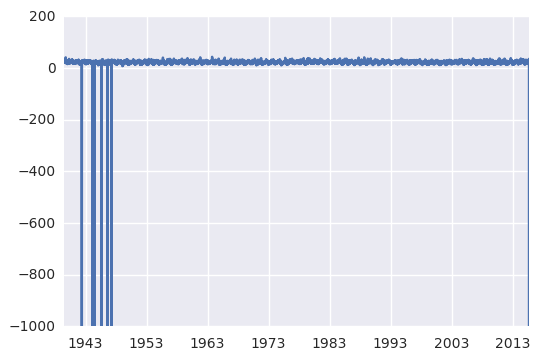

In [38]:
diego_tmax = getobs('USW00023188.dly','TMAX')
diego_tmin = getobs('USW00023188.dly','TMIN')
pp.plot(diego_tmax['date'],diego_tmax['value'])

In [41]:
def getobs(filename,obs): # remove -999 values
    data = np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])
    
    data['value'][data['value'] < -100] = np.nan
    
    return data

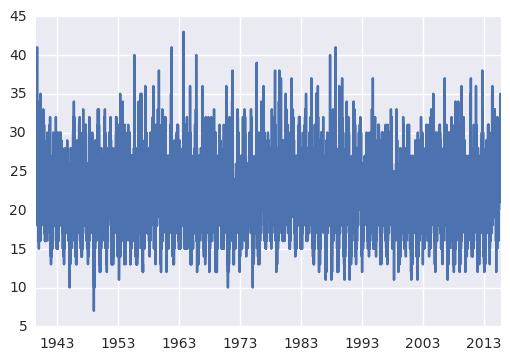

In [42]:
diego_tmax = getobs('USW00023188.dly','TMAX')
diego_tmin = getobs('USW00023188.dly','TMIN')
pp.plot(diego_tmax['date'],diego_tmax['value'])

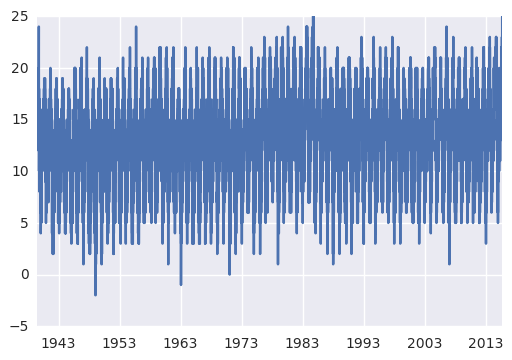

In [43]:
pp.plot(diego_tmin['date'],diego_tmin['value'])

In [44]:
def fillnans(data):
    dates_float = data['date'].astype(np.float64)
    
    nan = np.isnan(data['value'])
    
    data['value'][nan] = np.interp(dates_float[nan],dates_float[~nan],data['value'][~nan])

In [45]:
fillnans(diego_tmax)
fillnans(diego_tmin)

In [46]:
np.mean(diego_tmin['value']), np.mean(diego_tmax['value'])

(13.509622634734839, 20.99716347707443)

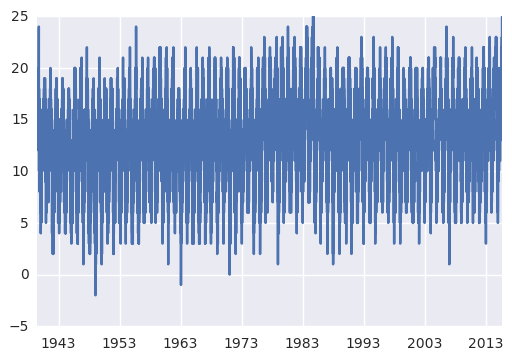

In [47]:
pp.plot(diego_tmin['date'],diego_tmin['value'])

In [48]:
def plot_smoothed(t,win=10):
    smoothed = np.correlate(t['value'],np.ones(win)/win,'same')
    pp.plot(t['date'],smoothed)

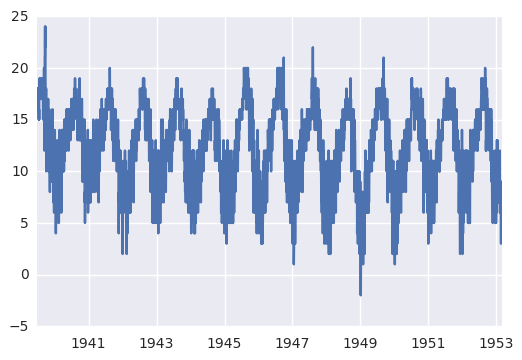

In [52]:
pp.plot(diego_tmin[:5000]['date'],diego_tmin[:5000]['value'])

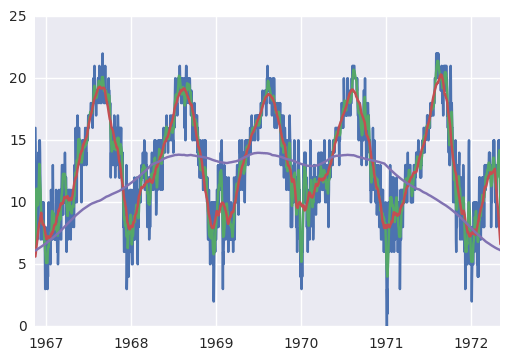

In [57]:
pp.plot(diego_tmin[10000:12000]['date'],diego_tmin[10000:12000]['value'])
plot_smoothed(diego_tmin[10000:12000])
plot_smoothed(diego_tmin[10000:12000],50)
plot_smoothed(diego_tmin[10000:12000],1000)

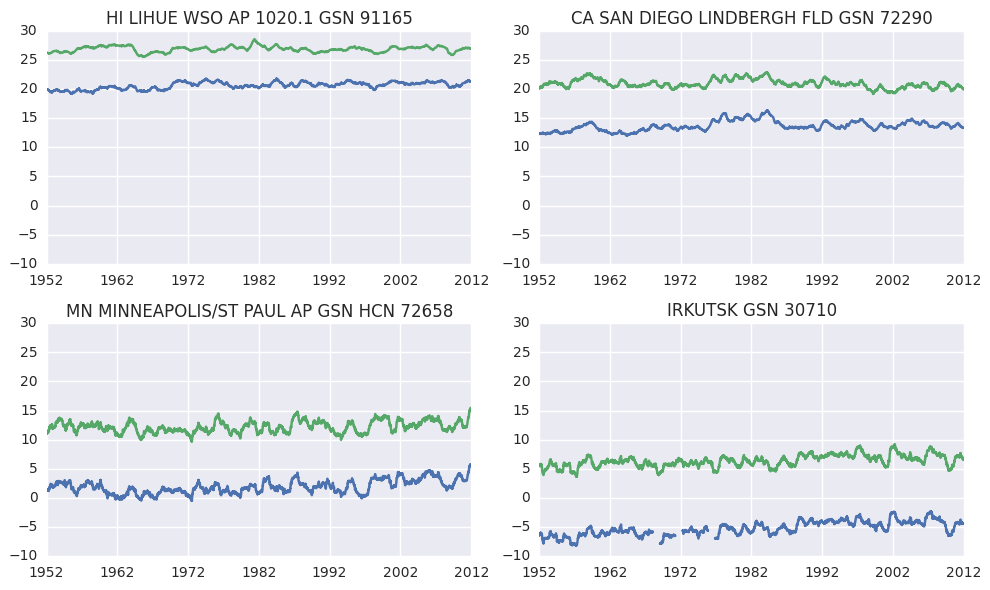

In [60]:
datastations = ['USW00022536','USW00023188','USW00014922','RSM00030710']
pp.figure(figsize=(10,6))

for i,code in enumerate(datastations):
    pp.subplot(2,2,i+1)
    
    plot_smoothed(getobs('{}.dly'.format(code),'TMIN'),365)
    plot_smoothed(getobs('{}.dly'.format(code),'TMAX'),365)
    
    pp.title(tracked_stations[code])
    pp.axis(xmin=np.datetime64('1952'),xmax=np.datetime64('2012'),ymin=-10,ymax=30)

pp.tight_layout()

In [62]:
def selectyear(data,year):
    start = np.datetime64('{}'.format(year))
    end = start + np.timedelta64(1,'Y')
    return data[(data['date'] >= start) & (data['date'] < end)]['value']

In [63]:
selectyear(diego_tmin,2000)

array([ 10.,   9.,   7.,   7.,   7.,   6.,   7.,   6.,   6.,   6.,   7.,
        11.,   8.,  11.,  12.,  11.,  15.,  15.,  13.,  14.,  13.,  12.,
        10.,  14.,  14.,  11.,   8.,   8.,   8.,  11.,  11.,   9.,  13.,
        10.,  11.,  13.,  11.,  10.,  13.,  11.,  12.,  12.,  12.,  12.,
        13.,  12.,  12.,  10.,   8.,  11.,  12.,  11.,  10.,  11.,  11.,
        11.,   9.,  11.,  11.,   8.,  11.,  10.,  11.,  11.,   9.,   7.,
        10.,  10.,   8.,   9.,  10.,  11.,  13.,  11.,  12.,  12.,  13.,
        13.,  12.,  12.,   9.,  10.,  11.,  11.,  12.,  12.,  13.,  13.,
        13.,  13.,  10.,  11.,  13.,  13.,  13.,  13.,  13.,  14.,  13.,
        14.,  14.,  13.,  14.,  13.,  15.,  13.,  13.,  12.,  13.,  12.,
        12.,  13.,  14.,  14.,  13.,  14.,  15.,  15.,  15.,  14.,  14.,
        15.,  16.,  16.,  16.,  16.,  16.,  15.,  16.,  16.,  15.,  15.,
        13.,  13.,  14.,  14.,  15.,  13.,  15.,  16.,  15.,  14.,  15.,
        15.,  16.,  16.,  16.,  16.,  16.,  16.,  1

In [65]:
diego_tmax_all = np.vstack([selectyear(diego_tmax,year)[:365] for year in range(1951,2014+1)])
diego_tmin_all = np.vstack([selectyear(diego_tmin,year)[:365] for year in range(1951,2014+1)])

(0.0, 365, -10.0, 50.0)

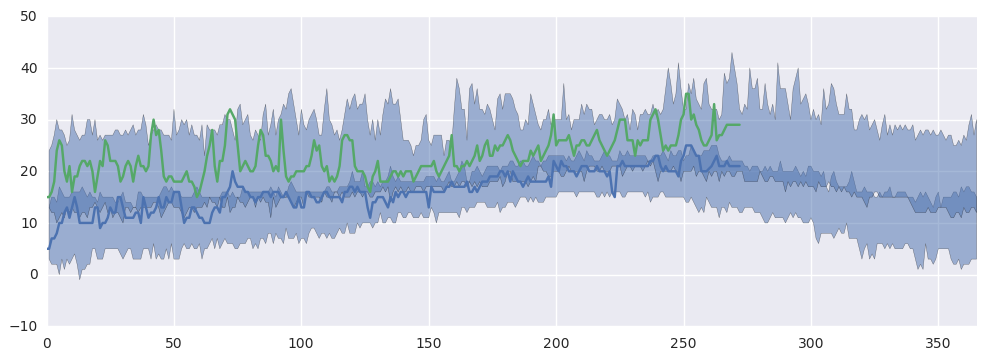

In [68]:
pp.figure(figsize=(12,4))

days = np.arange(1,365+1)

pp.fill_between(days,np.min(diego_tmin_all,axis=0),np.max(diego_tmin_all,axis=0),alpha=0.5)
pp.plot(selectyear(diego_tmin,2015))

pp.fill_between(days,np.min(diego_tmax_all,axis=0),np.max(diego_tmax_all,axis=0),alpha=0.5)
pp.plot(selectyear(diego_tmax,2015))

pp.axis(xmax=365)

In [69]:
# san diego vs minneapolis 
minneapolis_tmax = getobs('USW00014922.dly','TMAX')
minneapolis_tmin = getobs('USW00014922.dly','TMIN')
sandiego_tmax = getobs('USW00023188.dly','TMAX')
sandiego_tmin = getobs('USW00023188.dly','TMIN')

fillnans(minneapolis_tmax)
fillnans(minneapolis_tmin)
fillnans(sandiego_tmax)
fillnans(sandiego_tmin)

In [70]:
years = np.arange(1940,2014+1)

minneapolis_tmax_all = np.vstack([selectyear(minneapolis_tmax,year)[:365] for year in years])
minneapolis_mean = np.mean(minneapolis_tmax_all,axis=1)

sandiego_tmin_all = np.vstack([selectyear(sandiego_tmin,year)[:365] for year in years])
sandiego_mean = np.mean(sandiego_tmin_all,axis=1)

In [71]:
minneapolis_warmest = years[np.argmax(minneapolis_mean)]
minneapolis_warmest

2012

In [72]:
sandiego_coldest = years[np.argmin(sandiego_mean)]
sandiego_coldest

1948

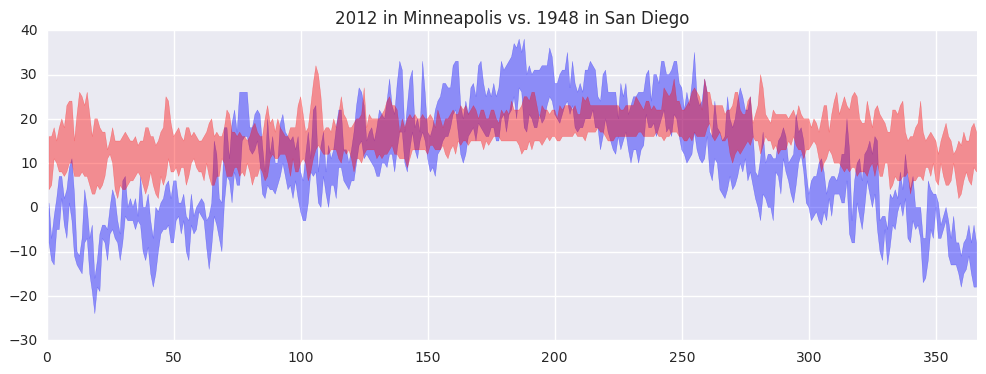

In [74]:
pp.figure(figsize=(12,4))

days = np.arange(1,366+1)

pp.fill_between(days,
                selectyear(minneapolis_tmin,minneapolis_warmest),
                selectyear(minneapolis_tmax,minneapolis_warmest),
                color='b',alpha=0.4)

pp.fill_between(days,
                selectyear(sandiego_tmin,sandiego_coldest),
                selectyear(sandiego_tmax,sandiego_coldest),
                color='r',alpha=0.4)

pp.axis(xmax=366)

pp.title('{} in Minneapolis vs. {} in San Diego'.format(minneapolis_warmest,sandiego_coldest))